In [9]:
%matplotlib inline
# Allows us to create Deep Dream style visualizations

# Heavily inspired by https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
from keras.models import load_model
from keras import backend as K
from max_patch import get_convolutional_layers
import numpy as np

In [78]:
#### COPIED FROM https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html


def get_image(layer_name='conv2/3x3_reduce', filter_index=0, step=lambda i: 0.1, iterations=50):

    colors, img_width, img_height = model.layers[0].input_shape[-3:]

    input_img = model.layers[0].input

    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    loss = -K.mean(layer_output[:, filter_index, :, :])

    # compute the gradient of the input picture with this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # we start from a gray image with some noise
    input_img_data = np.random.random((1, colors, img_width, img_height)) * 100 + 128.
    # run gradient ascent for 20 steps
    
    import tqdm
    
    for i in tqdm.tqdm(range(iterations)):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step(i)

    return input_img_data



In [74]:

#model = load_model('example_model.h5')
from googlenet.googlenet import *

model = create_googlenet('googlenet/googlenet_weights.h5')
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_dict

{'activation_11': <keras.layers.core.Activation at 0x11ebd2da0>,
 'activation_12': <keras.layers.core.Activation at 0x11eb17550>,
 'conv1/7x7_s2': <keras.layers.convolutional.Convolution2D at 0x121d0da90>,
 'conv2/3x3': <keras.layers.convolutional.Convolution2D at 0x120c6d470>,
 'conv2/3x3_reduce': <keras.layers.convolutional.Convolution2D at 0x11c695550>,
 'conv2/norm2': <googlenet.googlenet_custom_layers.LRN at 0x11c6d0b38>,
 'dropout_16': <keras.layers.core.Dropout at 0x11eb2a978>,
 'dropout_17': <keras.layers.core.Dropout at 0x127e57f28>,
 'dropout_18': <keras.layers.core.Dropout at 0x1263224a8>,
 'flatten_16': <keras.layers.core.Flatten at 0x12aa9fc88>,
 'flatten_17': <keras.layers.core.Flatten at 0x1292d7358>,
 'flatten_18': <keras.layers.core.Flatten at 0x11f3d0cc0>,
 'inception_3a/1x1': <keras.layers.convolutional.Convolution2D at 0x1262e0400>,
 'inception_3a/3x3': <keras.layers.convolutional.Convolution2D at 0x12b9eda20>,
 'inception_3a/3x3_reduce': <keras.layers.convolutional

100%|██████████| 50/50 [00:15<00:00,  3.36it/s]


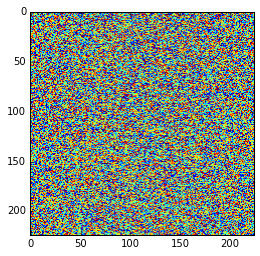

100%|██████████| 50/50 [00:15<00:00,  3.06it/s]


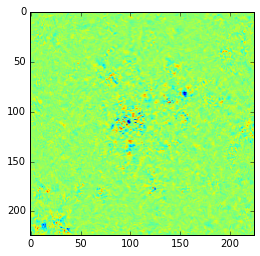

100%|██████████| 50/50 [00:14<00:00,  3.34it/s]


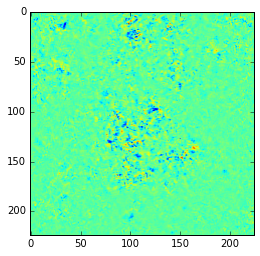

100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


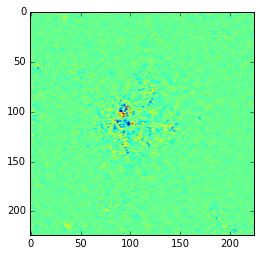

100%|██████████| 50/50 [00:15<00:00,  3.22it/s]


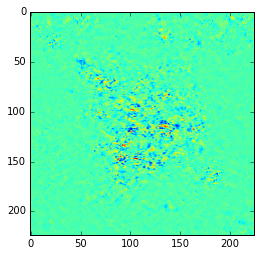

 58%|█████▊    | 29/50 [00:08<00:06,  3.29it/s]


KeyboardInterrupt: 

In [79]:
for i in range(16):
    import matplotlib.pyplot as plt
    plt.figure()
    
    image = get_image(layer_name='inception_5b/5x5', filter_index=i, step=lambda i: max(500/(i+1),0.05))[0]
    # Unpreprocess the image
    image = image.transpose(1,2,0)
    image += 115
    
    plt.imshow(image[:,:,0])
    plt.show()

[[[ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]]

 [[ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]]]
(224, 224, 3)


ValueError: Colormap rgb is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

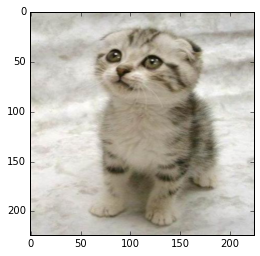

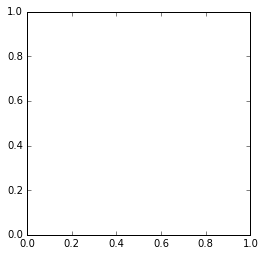

In [72]:
# Figuring out how to undo a transposition
shape = (2,3,5)
import numpy as np
A = np.array([ [ [k+j*3+i*9 for k in range(shape[2])] for j in range(shape[1])] for i in range(shape[0])])
T = A.transpose(2,0,1)

X = T.transpose(1,2,0)
print(X == A)

from scipy.misc import imread, imresize

img = imresize(imread('googlenet/cat_pictures/cat1.jpg', mode='RGB'), (224, 224)).astype(np.float32)
plt.imshow(imresize(imread('googlenet/cat_pictures/cat1.jpg', mode='RGB'), (224, 224)).astype(np.uint8))

plt.figure()
img[:, :, 0] -= 123.68
img[:, :, 1] -= 116.779
img[:, :, 2] -= 103.939
img[:,:,[0,1,2]] = img[:,:,[2,1,0]]
img = img.transpose((2, 0, 1))
#img = np.expand_dims(img, axis=0)


image = img.transpose(1,2,0)
#image += 115
print(image.shape)
image[:,:,[0,0,0]] = image[:,:,[2,1,0]]
img[:, :, 0] += 123.68
img[:, :, 1] += 116.779
img[:, :, 2] += 103.939
plt.imshow(image)
print(image.shape)
image[:2,:2,:]

In [67]:
imresize(imread('googlenet/cat_pictures/cat1.jpg', mode='RGB'), (224, 224))

array([[[204, 204, 196],
        [200, 200, 192],
        [202, 202, 194],
        ..., 
        [195, 196, 190],
        [197, 198, 192],
        [197, 197, 193]],

       [[203, 203, 195],
        [198, 198, 190],
        [200, 200, 192],
        ..., 
        [197, 198, 193],
        [199, 200, 195],
        [199, 199, 195]],

       [[200, 200, 192],
        [198, 198, 190],
        [199, 199, 191],
        ..., 
        [199, 200, 195],
        [201, 202, 197],
        [201, 202, 198]],

       ..., 
       [[206, 204, 204],
        [204, 202, 202],
        [205, 204, 203],
        ..., 
        [208, 208, 208],
        [204, 204, 204],
        [203, 203, 203]],

       [[206, 204, 206],
        [205, 203, 204],
        [205, 203, 203],
        ..., 
        [210, 210, 210],
        [207, 207, 207],
        [205, 205, 205]],

       [[206, 204, 207],
        [205, 203, 206],
        [204, 202, 203],
        ..., 
        [211, 211, 211],
        [208, 208, 208],
        [206, 206,